# Training Image Classification Model with SGD

|Item|Description|
|---|---|
|DeepLearning Framework|PyTorch|
|Dataset|CIFAR-100|
|Model Architecture|Simple CNN|
|Optimizer|SGD|


In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
import random
import numpy as np
import torch
import pprint
import matplotlib.pyplot as plt

from data_loader.data_loader import DataLoader
from models.pytorch import simple_cnn

## Set Random Seed

In [3]:
seed=42

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

## Device Settings

In [4]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

## Hyperparameters

In [5]:
epochs = 200
batch_size = 256
learning_rate = 0.001

## Load Dataset and Normalize

In [6]:
dataset_dir = '/tmp/dataset'
dataloader = DataLoader(dataset_name='cifar100_pytorch', dataset_dir=dataset_dir)

100% 169001437/169001437 [00:11<00:00, 15108293.13it/s]


Extracting /tmp/dataset/cifar-100-python.tar.gz to /tmp/dataset
Files already downloaded and verified


## Training Model

In [7]:
input_size = (batch_size, 3, 32, 32)
num_classes = 100
model = simple_cnn.SimpleCNN(device, input_size=input_size, num_classes=num_classes)

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [256, 100]                --
├─Conv2d: 1-1                            [256, 64, 32, 32]         1,792
├─ReLU: 1-2                              [256, 64, 32, 32]         --
├─BatchNorm2d: 1-3                       [256, 64, 32, 32]         128
├─Conv2d: 1-4                            [256, 64, 32, 32]         36,928
├─ReLU: 1-5                              [256, 64, 32, 32]         --
├─BatchNorm2d: 1-6                       [256, 64, 32, 32]         128
├─MaxPool2d: 1-7                         [256, 64, 16, 16]         --
├─Dropout: 1-8                           [256, 64, 16, 16]         --
├─Conv2d: 1-9                            [256, 128, 16, 16]        73,856
├─ReLU: 1-10                             [256, 128, 16, 16]        --
├─BatchNorm2d: 1-11                      [256, 128, 16, 16]        256
├─Conv2d: 1-12                           [256, 128, 16, 16]        147,

In [14]:
model_dir = 'cifar-100_model'
train_result = model.train(dataloader.dataset.trainloader, epochs=epochs, lr=learning_rate, output_dir=model_dir)

[EPOCH #0] loss: 4.060061544618466
[EPOCH #1, elapsed time: 11.098[sec]] loss: 4.068533983584482
[EPOCH #2, elapsed time: 23.047[sec]] loss: 4.065627505210296
[EPOCH #3, elapsed time: 34.177[sec]] loss: 4.07116776830633
[EPOCH #4, elapsed time: 44.918[sec]] loss: 4.069079741864195
[EPOCH #5, elapsed time: 56.031[sec]] loss: 4.067486869320225
[EPOCH #6, elapsed time: 66.932[sec]] loss: 4.064529945967827
[EPOCH #7, elapsed time: 77.749[sec]] loss: 4.067214099855966
[EPOCH #8, elapsed time: 88.487[sec]] loss: 4.064655579898271
[EPOCH #9, elapsed time: 100.310[sec]] loss: 4.063827034913037
[EPOCH #10, elapsed time: 110.927[sec]] loss: 4.062939325358268
[EPOCH #11, elapsed time: 125.526[sec]] loss: 4.059519583188946
[EPOCH #12, elapsed time: 136.508[sec]] loss: 4.062604954970317
[EPOCH #13, elapsed time: 147.722[sec]] loss: 4.057773051167327
[EPOCH #14, elapsed time: 158.676[sec]] loss: 4.059442870676403
[EPOCH #15, elapsed time: 169.396[sec]] loss: 4.060643579284121
[EPOCH #16, elapsed tim

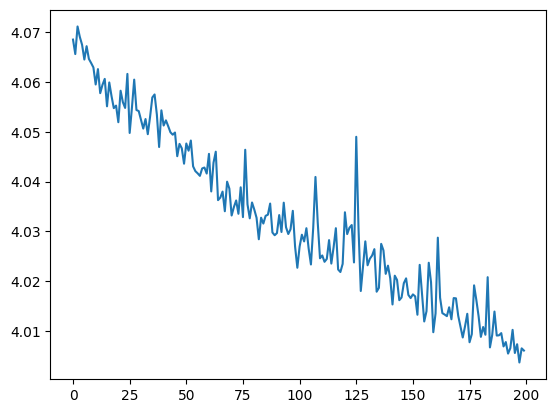

In [18]:
x = [epoch for epoch in range(epochs)]
plt.plot(x, train_result['loss'])

## Test Model

In [10]:
train_result = model.predict(dataloader.dataset.trainloader)
train_predictions, train_labels = train_result

In [11]:
train_eval_result = model.evaluate(train_labels, train_predictions)
pprint.pprint(train_eval_result)

{'accuracy': 0.56602,
 'classification_report': {'0': {'f1-score': 0.7144060657118786,
                                 'precision': 0.6171761280931587,
                                 'recall': 0.848,
                                 'support': 500},
                           '1': {'f1-score': 0.6572379367720466,
                                 'precision': 0.5626780626780626,
                                 'recall': 0.79,
                                 'support': 500},
                           '10': {'f1-score': 0.4807511737089202,
                                  'precision': 0.45309734513274336,
                                  'recall': 0.512,
                                  'support': 500},
                           '11': {'f1-score': 0.4094754653130288,
                                  'precision': 0.3548387096774194,
                                  'recall': 0.484,
                                  'support': 500},
                           '12': {'f1-score': 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
test_result = model.predict(dataloader.dataset.testloader)
test_predictions, test_labels = test_result

In [13]:
test_eval_result = model.evaluate(test_labels, test_predictions)
pprint.pprint(test_eval_result)

{'accuracy': 0.444,
 'classification_report': {'0': {'f1-score': 0.5793650793650794,
                                 'precision': 0.48026315789473684,
                                 'recall': 0.73,
                                 'support': 100},
                           '1': {'f1-score': 0.49586776859504134,
                                 'precision': 0.4225352112676056,
                                 'recall': 0.6,
                                 'support': 100},
                           '10': {'f1-score': 0.3069767441860466,
                                  'precision': 0.28695652173913044,
                                  'recall': 0.33,
                                  'support': 100},
                           '11': {'f1-score': 0.29184549356223183,
                                  'precision': 0.2556390977443609,
                                  'recall': 0.34,
                                  'support': 100},
                           '12': {'f1-score': 0.5

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
